In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
MAX_EVALUE = 1e-2

## MIBiG BGCs (positives)

In [7]:
domains = pd.read_csv('MIBiG.pfam.tsv', delimiter='\t')
domains

,sequence_id,protein_id,gene_start,gene_end,gene_strand,pfam_id,in_cluster
0,BGC0000001.1,AEK75490.1,0,1083,1,PF02353,1
1,BGC0000001.1,AEK75490.1,0,1083,1,PF01135,1
2,BGC0000001.1,AEK75490.1,0,1083,1,PF01269,1
3,BGC0000001.1,AEK75490.1,0,1083,1,PF13489,1
4,BGC0000001.1,AEK75490.1,0,1083,1,PF01596,1
...,...,...,...,...,...,...,...
96407,BGC0001833.1,AYA44686.1,0,15051,1,PF13193,1
96408,BGC0001833.1,AYA44686.1,0,15051,1,PF00668,1
96409,BGC0001833.1,AYA44686.1,0,15051,1,PF00550,1
96410,BGC0001833.1,AYA44686.1,0,15051,1,PF00975,1


In [8]:
num_contigs = len(domains['sequence_id'].unique())
num_contigs

1984

In [9]:
df = pd.DataFrame()

df['sequence_id'] = domains['sequence_id']
df.drop_duplicates(subset=['sequence_id'], inplace=True)

df['prefix'] = domains['sequence_id'].str.extract(r'(^[^.]+)')
df['suffix'] = domains['sequence_id'].str.extract(r'(\.\d+)$')


df['suffix'].value_counts()


suffix
.1     1808
.2       67
.3       27
.4       18
.5       12
.6        9
.7        8
.9        7
.8        6
.10       5
.11       5
.12       3
.15       2
.14       2
.13       1
.16       1
.17       1
.18       1
.19       1
Name: count, dtype: int64

In [10]:
properties = pd.read_csv('MIBiG.classes.csv')
properties


,contig_id,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene
0,BGC0000001.1,0,0,0,1,0,0,0
1,BGC0000002.1,0,0,0,1,0,0,0
2,BGC0000003.1,0,0,0,1,0,0,0
3,BGC0000004.1,0,0,0,1,0,0,0
4,BGC0000005.1,0,0,0,1,0,0,0


In [11]:
num_contigs = len(properties['contig_id'].unique())
num_contigs

2018

In [12]:
properties['contig_id'].str.extract(r'(\.\d+)$').value_counts()

0  
.1     1814
.2       69
.3       31
.4       23
.5       16
.6       12
.7       10
.8        9
.10       8
.9        8
.11       5
.12       3
.15       2
.14       2
.13       2
.19       1
.17       1
.16       1
.18       1
Name: count, dtype: int64

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


set1 = set(df['sequence_id'])
set2 = set(properties['contig_id'])

# Calculate intersections and differences
only_in_df = len(set1 - set2)  # Unique in df['sequence_id']
only_in_properties = len(set2 - set1)  # Unique in properties['contig_id']
common = len(set1 & set2)  # Present in both

print("Only in df: ", set1 - set2)
print("Only in prop: ", set2 - set1)
print("Common", common)


Only in df:  {'BGC0001833.1', 'BGC0001832.1', 'BGC0001831.1', 'BGC0001482.1', 'BGC0001832.2', 'BGC0000880.1'}
Only in prop:  {'BGC0001272.8', 'BGC0000183.1', 'BGC0001398.9', 'BGC0001613.10', 'BGC0001270.7', 'BGC0000478.1', 'BGC0000095.7', 'BGC0000492.1', 'BGC0001259.5', 'BGC0001259.8', 'BGC0000476.1', 'BGC0001279.1', 'BGC0001243.4', 'BGC0001263.1', 'BGC0001680.1', 'BGC0001272.4', 'BGC0001272.5', 'BGC0001107.4', 'BGC0001398.6', 'BGC0000183.4', 'BGC0000482.1', 'BGC0001613.6', 'BGC0001450.10', 'BGC0001398.13', 'BGC0001259.3', 'BGC0001243.10', 'BGC0000095.6', 'BGC0001269.1', 'BGC0001481.1', 'BGC0000183.2', 'BGC0001259.2', 'BGC0000183.3', 'BGC0001272.2', 'BGC0001466.3', 'BGC0001259.4', 'BGC0000683.1', 'BGC0001270.5', 'BGC0001272.3', 'BGC0001107.5', 'BGC0001243.8'}
Common 1978


In [15]:
contig_ids = properties['contig_id'].unique()
contig_ids = list(np.intersect1d(contig_ids, labels.index))
len(contig_ids)

2018

In [14]:
labels = pd.read_csv("MIBiG.classes.csv").set_index('contig_id')
NUM_LABELS = labels.shape[1]
labels.sample(5)

,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene
contig_id,,,,,,,
BGC0000796.1,0,0,0,0,0,1,0
BGC0000803.1,0,0,0,0,0,1,0
BGC0001189.1,0,1,0,0,0,0,0
BGC0000053.1,0,0,0,1,0,0,0
BGC0000366.1,0,1,0,0,0,0,0


# GeneSwap negatives

In [3]:
domains = pd.read_csv('GeneSwap_Negatives.pfam.tsv', delimiter='\t', index_col=0)
domains

,contig_id,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,bitscore,in_cluster
0,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF00702,0.0,210.0,138.5,0
1,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF00403,1.0,61.0,45.8,0
2,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF00122,2.0,178.0,162.4,0
3,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF08282,196.0,255.0,20.6,0
4,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1503,2237,4870,1,PF00593,1.0,469.0,93.7,0
...,...,...,...,...,...,...,...,...,...,...
706945,NEG_FAKE_CLUSTER|U00096.3|AB007043.2,U00096_4155,4452,5399,-1,PF13384,16.0,49.0,18.5,0
706946,NEG_FAKE_CLUSTER|U00096.3|AB007043.2,U00096_4155,4452,5399,-1,PF09339,17.0,40.0,16.5,0
706947,NEG_FAKE_CLUSTER|U00096.3|AB007043.2,U00096_4155,4452,5399,-1,PF00532,22.0,274.0,40.2,0
706948,NEG_FAKE_CLUSTER|U00096.3|AB007043.2,U00096_3308,5399,6625,-1,PF01676,1.0,243.0,169.8,0


In [4]:
num_contigs = len(domains['contig_id'].unique())
num_contigs

10128

In [6]:
grouped = domains.groupby("contig_id")["pfam_id"].apply(list)

# Get the first group's list of Pfam IDs
first_contig_pfam_list = grouped.iloc[1]

print(first_contig_pfam_list)


['PF01926', 'PF03938', 'PF00350', 'PF02108', 'PF14400', 'PF01053', 'PF01041', 'PF00155', 'PF00266', 'PF01370', 'PF16363', 'PF01073', 'PF02719', 'PF07993', 'PF04321', 'PF01411', 'PF07973', 'PF02272', 'PF13662', 'PF02132', 'PF01370', 'PF16363', 'PF01073', 'PF02719', 'PF07993', 'PF04321', 'PF13662', 'PF02132', 'PF00701', 'PF08241', 'PF08242', 'PF02353', 'PF13649', 'PF13847', 'PF13489', 'PF12847', 'PF13679', 'PF05175', 'PF08123', 'PF01209', 'PF01596', 'PF01135', 'PF08003', 'PF01555', 'PF06325', 'PF13245', 'PF00004', 'PF13238', 'PF00910', 'PF13086', 'PF00580', 'PF09848', 'PF05729', 'PF03266', 'PF13604', 'PF04851', 'PF00005', 'PF13401', 'PF02562', 'PF01078', 'PF13476', 'PF13191', 'PF03193', 'PF00437', 'PF13905', 'PF00085', 'PF13098', 'PF13192', 'PF00462', 'PF13899', 'PF02966', 'PF00578', 'PF08534', 'PF06110', 'PF14595', 'PF04756', 'PF00294', 'PF01467', 'PF08543', 'PF13662', 'PF02132', 'PF02667', 'PF03606', 'PF03806', 'PF05670', 'PF05833', 'PF13184', 'PF08529', 'PF13538', 'PF13245', 'PF00580'

In [7]:
# Group by contig_id and get Pfam ID lists
grouped = domains.groupby("contig_id")["pfam_id"].apply(list)

# Extract the first 5 contigs' Pfam sequences
first_5_sequences = [grouped.iloc[i] for i in range(5)]

# Print the sequences in the desired format
print("[")
for i, seq in enumerate(first_5_sequences):
    print(f"    {seq},  # Sequence {i+1}")
print("]")


[
    ['PF00702', 'PF00403', 'PF00122', 'PF08282', 'PF00593', 'PF07715', 'PF13793', 'PF00156', 'PF14572', 'PF14681', 'PF01618', 'PF00593', 'PF07715'],  # Sequence 1
    ['PF01926', 'PF03938', 'PF00350', 'PF02108', 'PF14400', 'PF01053', 'PF01041', 'PF00155', 'PF00266', 'PF01370', 'PF16363', 'PF01073', 'PF02719', 'PF07993', 'PF04321', 'PF01411', 'PF07973', 'PF02272', 'PF13662', 'PF02132', 'PF01370', 'PF16363', 'PF01073', 'PF02719', 'PF07993', 'PF04321', 'PF13662', 'PF02132', 'PF00701', 'PF08241', 'PF08242', 'PF02353', 'PF13649', 'PF13847', 'PF13489', 'PF12847', 'PF13679', 'PF05175', 'PF08123', 'PF01209', 'PF01596', 'PF01135', 'PF08003', 'PF01555', 'PF06325', 'PF13245', 'PF00004', 'PF13238', 'PF00910', 'PF13086', 'PF00580', 'PF09848', 'PF05729', 'PF03266', 'PF13604', 'PF04851', 'PF00005', 'PF13401', 'PF02562', 'PF01078', 'PF13476', 'PF13191', 'PF03193', 'PF00437', 'PF13905', 'PF00085', 'PF13098', 'PF13192', 'PF00462', 'PF13899', 'PF02966', 'PF00578', 'PF08534', 'PF06110', 'PF14595', 'PF04

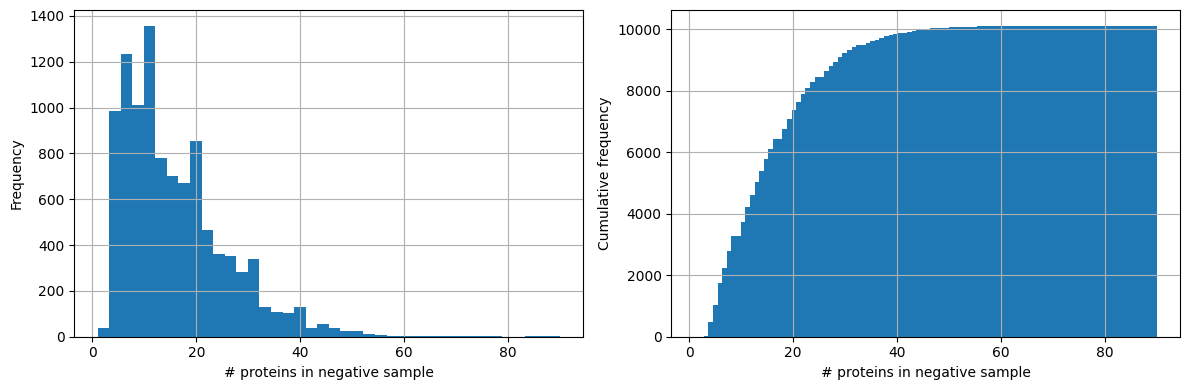

In [71]:
contig_proteins = domains.groupby("contig_id")['protein_id'].nunique()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = contig_proteins.hist(bins=40, ax=axes[0])
ax.set_xlabel('# proteins in negative sample')
ax.set_ylabel('Frequency')
ax = contig_proteins.hist(bins=100, ax=axes[1], cumulative=True)
ax.set_xlabel('# proteins in negative sample')
ax.set_ylabel('Cumulative frequency')
plt.tight_layout()

Text(0, 0.5, 'Frequency')

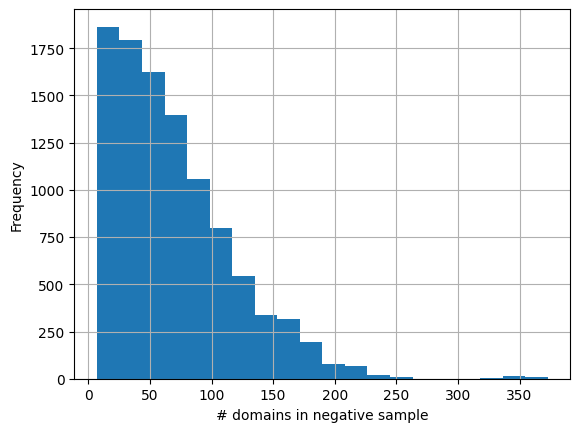

In [72]:
contig_domains = domains.groupby("contig_id")['pfam_id'].size()
ax = contig_domains.hist(bins=20)
ax.set_xlabel('# domains in negative sample')
ax.set_ylabel('Frequency')

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

domains = pd.read_csv('MIBiG.pfam.tsv', delimiter='\t')
domains.head()
domains.groupby('sequence_id').head()

,sequence_id,protein_id,gene_start,gene_end,gene_strand,pfam_id,in_cluster
0,BGC0000001.1,AEK75490.1,0,1083,1,PF02353,1
1,BGC0000001.1,AEK75490.1,0,1083,1,PF01135,1
2,BGC0000001.1,AEK75490.1,0,1083,1,PF01269,1
3,BGC0000001.1,AEK75490.1,0,1083,1,PF13489,1
4,BGC0000001.1,AEK75490.1,0,1083,1,PF01596,1
...,...,...,...,...,...,...,...
96406,BGC0001833.1,AYA44686.1,0,15051,1,PF00501,1
96407,BGC0001833.1,AYA44686.1,0,15051,1,PF13193,1
96408,BGC0001833.1,AYA44686.1,0,15051,1,PF00668,1
96409,BGC0001833.1,AYA44686.1,0,15051,1,PF00550,1


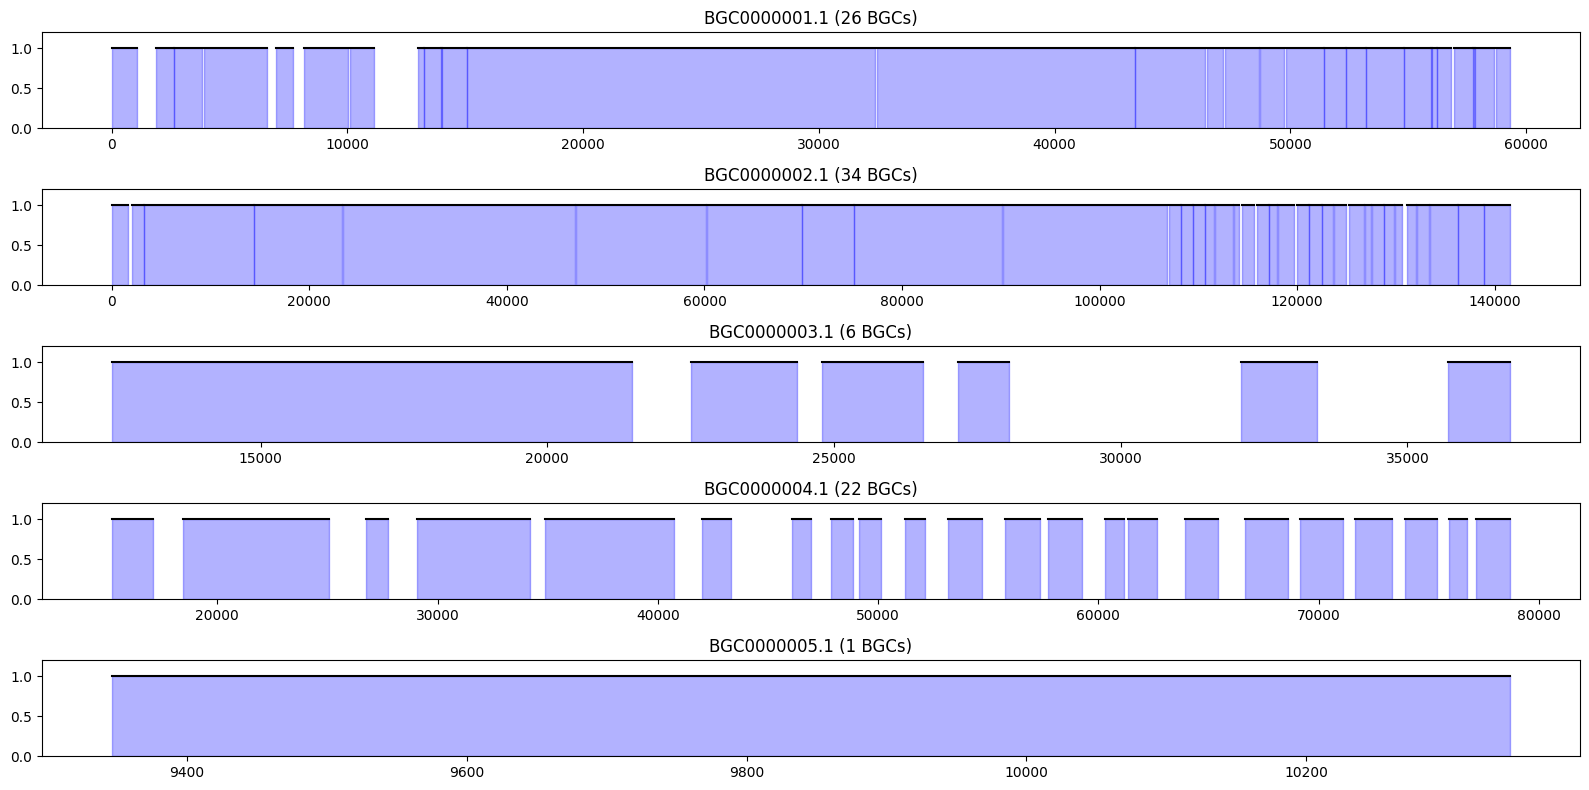

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, axes = plt.subplots(5, figsize=(16, 8))
i = 0
for contig_id, contig_bgcs in domains.groupby('sequence_id'):
    if(i==5): break

    contig_bgcs.drop_duplicates(subset=['protein_id'], inplace=True)
    num_bgcs = len(contig_bgcs)
    title = '{} ({} BGCs)'.format(contig_id, num_bgcs)
    axes[i].set_title(title)
    axes[i].set_ylim([0, 1.2])
    for b, bgc in contig_bgcs.iterrows():
        axes[i].plot([bgc['gene_start'], bgc['gene_end']], [1, 1], color='black')
        axes[i].fill_between([bgc['gene_start'], bgc['gene_end']], [1, 1], color='b', alpha=0.3)
    plt.tight_layout()
    i += 1

In [19]:
corpus = pd.read_csv('Word2Vec/pfam2vec-pfam31-corpus-p0.001.txt', nrows=10, header=None)
corpus

,0
0,PF01029 PF00885 PF00793 PF00484 PF00215 PF0256...
1,PF13087 PF13245 PF13086 PF13604 PF13378 PF0274...
2,PF00308 PF00004 PF08299 PF01695 PF02768 PF0071...
3,PF00308 PF08299 PF00004 PF11638 PF13173 PF0163...
4,PF03764 PF14492 PF00679 PF03144 PF00009 PF1665...
5,PF00933 PF01704 PF02878 PF02880 PF00579 PF0159...
6,PF04070 PF02686 PF01425 PF02934 PF02637 PF1746...
7,PF04070 PF02686 PF01425 PF02934 PF02637 PF0754...
8,PF00308 PF08299 PF11638 PF00004 PF13173 PF0163...
9,PF01029 PF00885 PF00793 PF00484 PF00215 PF0256...


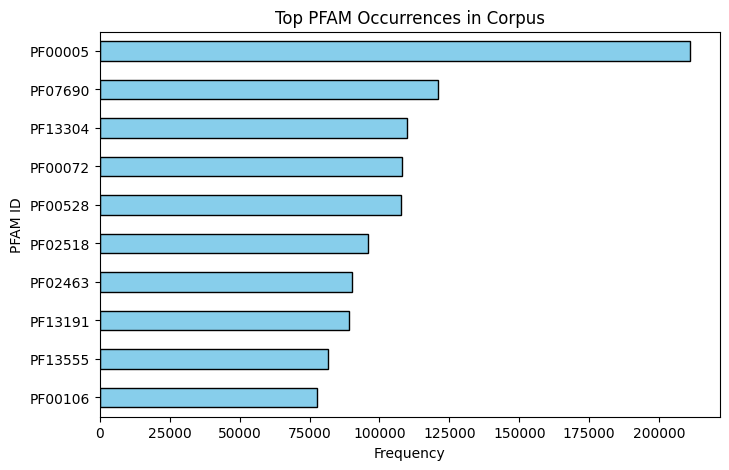

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read file as raw text (line by line)
with open("Word2Vec/pfam2vec-pfam31-corpus-p0.001.txt", "r") as f:
    lines = f.readlines()[:]  # Read first 10 lines

# Split each line into PFAMs and flatten
all_pfams = [pfam for line in lines for pfam in line.strip().split()]

# Count occurrences
pfam_counts = pd.Series(all_pfams).value_counts()

# Plot top PFAMs
pfam_counts[:10][::-1].plot.barh(figsize=(8, 5), color="skyblue", edgecolor="black")
plt.xlabel("Frequency")
plt.ylabel("PFAM ID")
plt.title("Top PFAM Occurrences in Corpus")
plt.show()


In [21]:
pfam_counts

PF00005    211195
PF07690    120984
PF13304    109758
PF00072    108057
PF00528    107526
            ...  
PF06098         1
PF08292         1
PF03326         1
PF05438         1
PF11600         1
Name: count, Length: 12398, dtype: int64